In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
from modelos.metricas import mse,accuracy, confusion_matrix
from modelos.LinearRegression import LinearRegression
from modelos.LogisticRegression import LogisticRegression
from modelos.DecisionTree import DecisionTree
from modelos.SVM import SVM
from modelos.KNN import KNN

# Regressão Linear

In [2]:
#Gerador de dados simulados para regressão
X, y = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

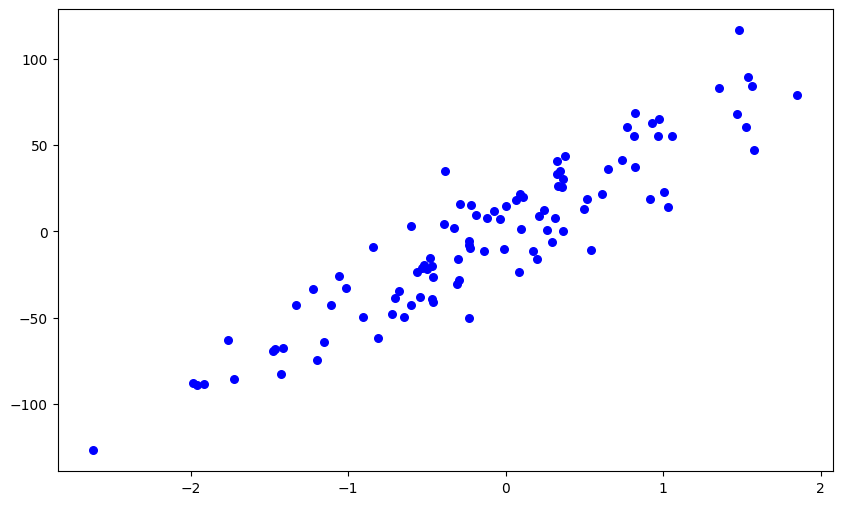

In [4]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='b', marker='o', s=30)
plt.show()

In [5]:
linreg = LinearRegression(learning_rate=0.01, n_iters=2000)
linreg.fit(X=X_train, y=y_train)

In [6]:
preds = linreg.predict(X=X_test)

In [7]:
len(X_test)

20

In [8]:
len(preds)

20

In [9]:
mse(y_hat=preds, y=y_test)

416.80890612749965

In [10]:
y_pred_total = linreg.predict(X=X)

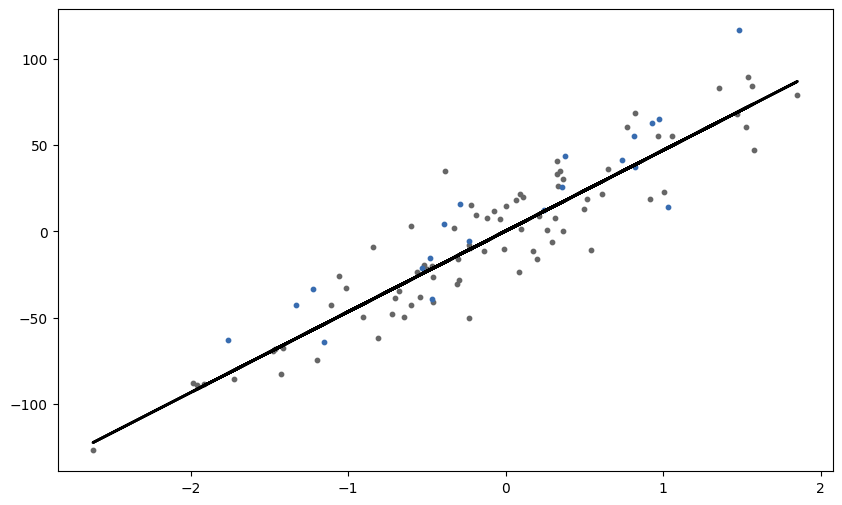

In [11]:
cmap = plt.get_cmap('Accent')
fig = plt.figure(figsize=(10,6))
m1  = plt.scatter(X_train, y_train, color=cmap(0.9), s=10)
m2 = plt.scatter(X_test, y_test, color=cmap(0.5), s=10)
plt.plot(X, y_pred_total, color="black", linewidth=2,label="Prediction")
plt.show()

# Regressão Logística

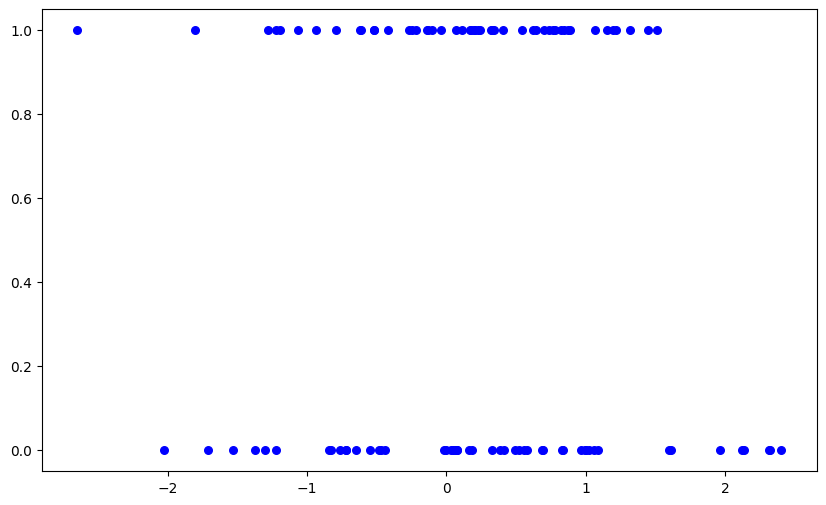

In [12]:
X, y = datasets.make_classification(random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='b', marker='o', s=30)
plt.show()

In [13]:
logreg = LogisticRegression()
logreg.fit(X=X_train, y=y_train)

In [14]:
y_pred = logreg.predict(X=X_test)

In [15]:
y_pred

[0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0]

In [16]:
accuracy(y_hat=y_pred, y=y_test)

0.9

In [17]:
confusion_matrix(y_pred, y=y_test)
#[TN, FP],
#[FN, TP]


[[11  2]
 [ 0  7]]


# Árvore de Decisão (ClassificationTree)

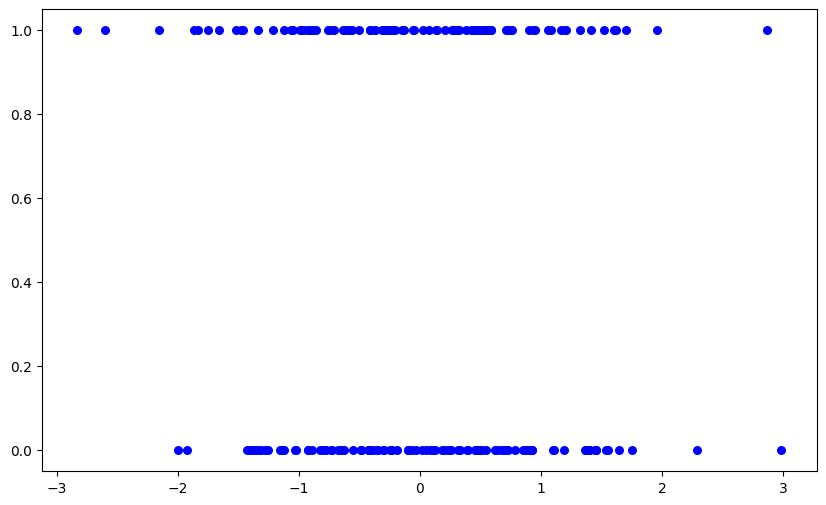

In [19]:
X, y = datasets.make_classification(n_samples=200,random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='b', marker='o', s=30)
plt.show()

In [20]:
dectree = DecisionTree(max_depth=10)
dectree.fit(X=X_train,y=y_train)

In [21]:
y_pred = dectree.predict(X=X_test)

In [22]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
accuracy(y_hat=y_pred, y=y_test) #bem ruim

0.5

In [24]:
confusion_matrix(y_pred, y=y_test)
#[TN, FP],
#[FN, TP]


[[20  0]
 [20  0]]


# Support Vector Machine (SVC) - com hinge loss e L2 mas sem kernel trick

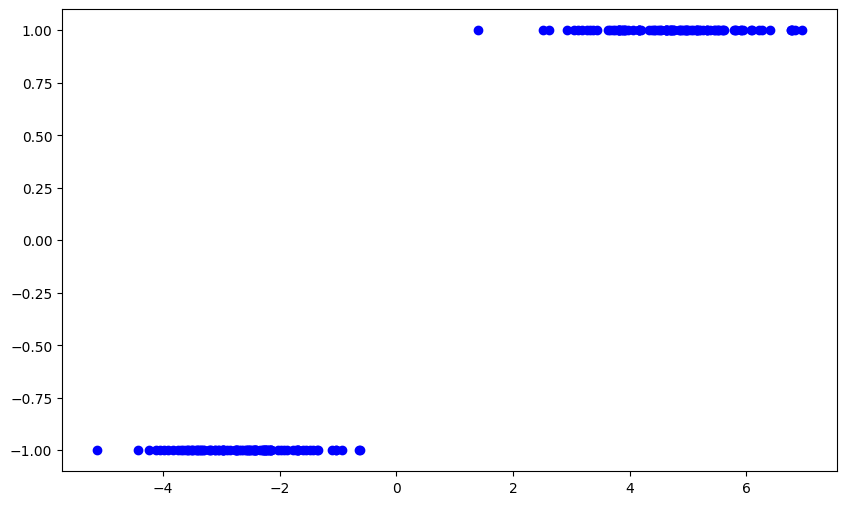

In [31]:
X, y = datasets.make_blobs(n_samples=200,n_features=2, centers=2, random_state=42)
y = np.where(y==0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
fig = plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='b', marker='o')
plt.show()

In [32]:
svc = SVM()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [33]:
y_pred

array([-1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,
       -1.])

In [35]:
accuracy(y_pred, y_test) 
#Considerando como a base está, faz sentido assumir acuracia de 100%

1.0

In [48]:
X, y = datasets.make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                                    n_classes=2, n_clusters_per_class=1, class_sep=2, random_state=42)


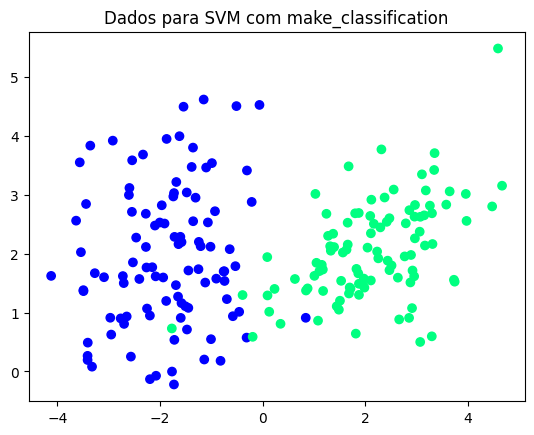

In [49]:
y = np.where(y==0, -1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Visualizando
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.title("Dados para SVM com make_classification")
plt.show()

In [50]:
svc = SVM()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
accuracy(y_pred, y_test) 
#Considerando como a base está, faz sentido assumir acuracia de 100%

0.9

# K Nearest Neighbours (Classification)

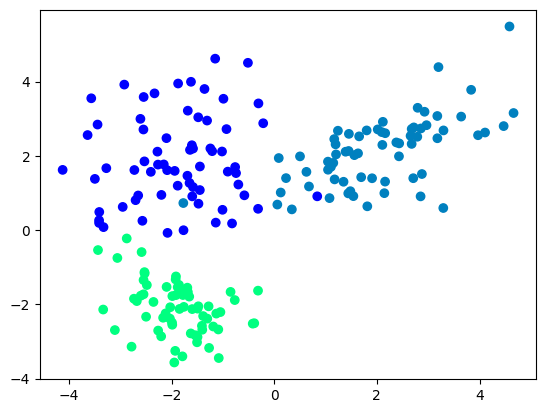

In [2]:
X, y = datasets.make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, 
                                    n_classes=3, n_clusters_per_class=1, class_sep=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Visualizando
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='winter')
plt.show()

In [3]:
knn = KNN(k=5)
knn.fit(X=X_train, y=y_train)
y_preds = knn.predict(X_test)

In [4]:
y_preds

[1,
 2,
 0,
 2,
 0,
 1,
 0,
 2,
 2,
 1,
 0,
 2,
 0,
 2,
 0,
 2,
 0,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 0,
 2,
 2,
 1,
 1]

In [5]:
accuracy(y_preds, y_test)

0.975